## 2017-1학기 전략경영 hedonic pricing model

중고차 데이터(출처 : https://www.kaggle.com/orgesleka/used-cars-database )

Over 370,000 used cars were scraped from Ebay-Kleinanzeigen. The content of the data is in German. The data is available [here](https://www.kaggle.com/orgesleka/used-cars-database) The fields included in the file data/autos.csv are:

- seller : private or dealer
- offerType
- vehicleType
- yearOfRegistration : at which year the car was first registered
- gearbox
- powerPS : power of the car in PS
- model
- kilometer : how many kilometers the car has driven
- monthOfRegistration : at which month the car was first registered
- fuelType
- brand
- notRepairedDamage : if the car has a damage which is not repaired yet
- price : the price on the ad to sell the car. 

**Goal**  
Given the characteristics/features of the car, the sale price of the car is to be predicted. 

In [18]:
#필요 모듈 불러오기
import pandas as pd
import statsmodels.api as sm
import math
import numpy as np
#Convert text to numeric using Label Encoding
from sklearn import preprocessing

In [3]:
#데이터 읽기
#불러오기 전에 엑셀 필터링 기능 활용해서 어느정도 가공 (ex 등록년도 1000~1800, 2017~5000 행 제거 등등...)
cars = pd.read_csv('autos_refined.csv', encoding='ISO-8859-1')

In [4]:
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-29 15:50,Minni_Modellauto,privat,Angebot,20.0,control,kleinwagen,1988.0,automatik,0.0,m_reihe,5000.0,1.0,andere,bmw,nein,2016-03-29 0:00,0.0,33813.0,2016-03-29 15:50
1,2016-03-14 21:38,Angebot!!!!!30,privat,Angebot,30.0,test,andere,2016.0,NaN,0.0,NaN,5000.0,1.0,andere,sonstige_autos,NaN,2016-03-14 0:00,0.0,73207.0,2016-04-06 11:46
2,2016-03-21 6:57,Auto_abschlepp_?erfuehrung__von_Kleinwagen,privat,Angebot,65.0,control,kleinwagen,1990.0,NaN,0.0,golf,150000.0,1.0,andere,volkswagen,NaN,2016-03-21 0:00,0.0,33647.0,2016-03-22 12:46
3,2016-03-06 19:42,2_Porsche_Embleme,privat,Angebot,180.0,control,andere,1970.0,manuell,0.0,andere,5000.0,1.0,andere,porsche,NaN,2016-03-06 0:00,0.0,38642.0,2016-04-06 22:18
4,2016-03-13 20:25,Go__Kart_ohne_Motor,privat,Angebot,275.0,test,andere,2010.0,automatik,1.0,NaN,5000.0,1.0,andere,sonstige_autos,NaN,2016-03-13 0:00,0.0,57648.0,2016-03-20 9:15


## 전처리

In [5]:
cars.describe()

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,2.906440e+05,290644.000000,290644.000000,290644.000000,290644.000000,290644.0,290644.000000
mean,1.652684e+04,2003.132936,123.429364,124852.637591,6.389972,0.0,51547.262373
std,4.010423e+06,6.603895,166.073718,39467.241373,3.349661,0.0,25733.503019
min,1.000000e+01,1911.000000,0.000000,5000.000000,1.000000,0.0,1067.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2.147484e+09,2016.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [7]:
# 변수명 불러오기
cars.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [8]:
#각 변수 타입보기
cars.dtypes

dateCrawled             object
name                    object
seller                  object
offerType               object
price                  float64
abtest                  object
vehicleType             object
yearOfRegistration     float64
gearbox                 object
powerPS                float64
model                   object
kilometer              float64
monthOfRegistration    float64
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
nrOfPictures           float64
postalCode             float64
lastSeen                object
dtype: object

In [9]:
#결측값 찾기
#각 변수 별 결측값 수
cars.isnull().sum()

dateCrawled                1
name                       1
seller                     1
offerType                  1
price                      1
abtest                     1
vehicleType                1
yearOfRegistration         1
gearbox                 6035
powerPS                    1
model                   8435
kilometer                  1
monthOfRegistration        1
fuelType                   1
brand                      1
notRepairedDamage      34521
dateCreated                1
nrOfPictures               1
postalCode                 1
lastSeen                   1
dtype: int64

In [10]:
#각 변수별 결측값 비율
cars.isnull().sum()/cars.shape[0] * 100

dateCrawled             0.000344
name                    0.000344
seller                  0.000344
offerType               0.000344
price                   0.000344
abtest                  0.000344
vehicleType             0.000344
yearOfRegistration      0.000344
gearbox                 2.076416
powerPS                 0.000344
model                   2.902166
kilometer               0.000344
monthOfRegistration     0.000344
fuelType                0.000344
brand                   0.000344
notRepairedDamage      11.877376
dateCreated             0.000344
nrOfPictures            0.000344
postalCode              0.000344
lastSeen                0.000344
dtype: float64

In [11]:
#결측값 변수 제거
cars_updated = cars.dropna()

In [12]:
cars.shape, cars_updated.shape

((290645, 20), (245984, 20))

In [14]:
#결측값 체크
cars_updated.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [15]:
#업데이트된 테이블 조회
cars_updated.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-29 15:50,Minni_Modellauto,privat,Angebot,20.0,control,kleinwagen,1988.0,automatik,0.0,m_reihe,5000.0,1.0,andere,bmw,nein,2016-03-29 0:00,0.0,33813.0,2016-03-29 15:50
5,2016-03-25 17:48,Suche_Kleinwagen,privat,Angebot,400.0,test,kleinwagen,2000.0,automatik,0.0,fiesta,90000.0,1.0,andere,ford,nein,2016-03-25 0:00,0.0,46117.0,2016-04-01 2:15
9,2016-03-23 18:36,Mercedes_Benz_230,privat,Angebot,1000.0,test,kombi,1998.0,automatik,150.0,andere,150000.0,1.0,andere,mercedes_benz,nein,2016-03-23 0:00,0.0,12055.0,2016-04-06 0:17
13,2016-03-23 18:36,Mercedes_W_210,privat,Angebot,1400.0,test,kombi,1998.0,automatik,150.0,e_klasse,150000.0,1.0,andere,mercedes_benz,ja,2016-03-23 0:00,0.0,12055.0,2016-04-03 23:17
15,2016-03-12 15:43,RENAULT_CLIO_1_4_16V_TOP,privat,Angebot,2500.0,control,andere,2004.0,automatik,2018.0,clio,80000.0,1.0,andere,renault,nein,2016-03-12 0:00,0.0,26123.0,2016-03-27 8:17


In [16]:
cars_updated.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [17]:
#사용할 변수들 선택
cars_updated = cars_updated.iloc[:, [2,3,6,7,8,9,10,11,12,13,14,15,4]]

In [19]:
#데이터 인코딩
cars_encoded = cars_updated.apply(preprocessing.LabelEncoder().fit_transform)

In [20]:
#인코딩된 데이터 확인
cars_encoded.head()

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
0,1,0,4,56,0,0,134,0,0,0,2,1,5
5,1,0,4,68,0,0,90,9,0,0,10,1,155
9,1,0,5,66,0,150,26,12,0,0,20,1,398
13,1,0,5,66,0,150,83,12,0,0,20,0,525
15,1,0,0,72,0,557,62,8,0,0,27,1,844


In [21]:
cars_encoded.columns

Index(['seller', 'offerType', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'price'],
      dtype='object')

In [26]:
#Exploratory data analysis
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# plt.rcParams['figure.figsize'] = (10, 6)

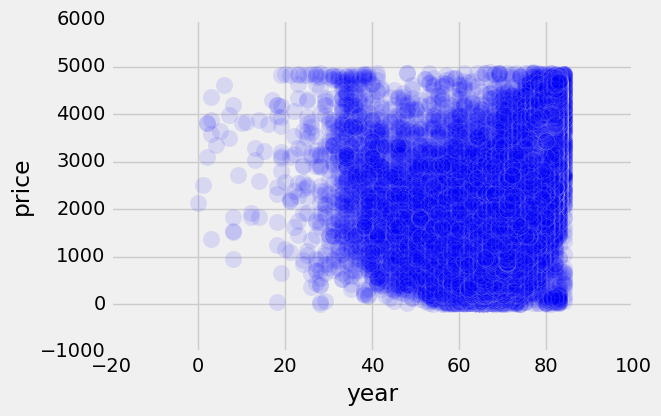

In [27]:
#Plot year vs price
plt.scatter(cars_encoded.yearOfRegistration, 
           cars_encoded.price,
           s=150, alpha = 0.1)
plt.xlabel('year')
plt.ylabel('price')

### 번외 label encoder 작동 확인

>>> le = preprocessing.LabelEncoder()
>>> le.fit(["paris", "paris", "tokyo", "amsterdam"])
LabelEncoder()
>>> list(le.classes_)
['amsterdam', 'paris', 'tokyo']
>>> le.transform(["tokyo", "tokyo", "paris"])
array([2, 2, 1])
>>> list(le.inverse_transform([2, 2, 1]))
['tokyo', 'tokyo', 'paris']

In [38]:
le_brand = preprocessing.LabelEncoder()

In [39]:
le_brand.fit(cars_updated['brand'])

LabelEncoder()

In [40]:
list(le_brand.classes_)

['alfa_romeo',
 'audi',
 'bmw',
 'chevrolet',
 'chrysler',
 'citroen',
 'dacia',
 'daewoo',
 'daihatsu',
 'fiat',
 'ford',
 'honda',
 'hyundai',
 'jaguar',
 'jeep',
 'kia',
 'lada',
 'lancia',
 'land_rover',
 'mazda',
 'mercedes_benz',
 'mini',
 'mitsubishi',
 'nissan',
 'opel',
 'peugeot',
 'porsche',
 'renault',
 'rover',
 'saab',
 'seat',
 'skoda',
 'smart',
 'subaru',
 'suzuki',
 'toyota',
 'trabant',
 'volkswagen',
 'volvo']

In [41]:
cars_encoded['brand']

0          2
5         10
9         20
13        20
15        27
23        37
24        29
28        22
30         1
31        12
32        37
37        37
38        10
39        24
40        11
46         9
47        27
49        23
51        38
52        38
55        24
57        19
58        37
59        10
60        24
61         2
62         3
65        34
66        37
67        25
          ..
290607    11
290608    33
290609    38
290610    20
290611    37
290613    37
290614    14
290615     1
290616    20
290617    26
290618     2
290619    26
290620    24
290621     1
290622    20
290623    20
290624    20
290625     1
290626     1
290627     1
290628    27
290629    20
290630    12
290631    20
290632    26
290633    20
290634    20
290637    20
290638     2
290641    26
Name: brand, dtype: int64

In [42]:
le_notRepairedDamage = preprocessing.LabelEncoder()
le_notRepairedDamage.fit(cars_updated['notRepairedDamage'])

LabelEncoder()

In [43]:
list(le_notRepairedDamage.classes_)

['ja', 'nein']

In [45]:
cars_encoded['notRepairedDamage']

0         1
5         1
9         1
13        0
15        1
23        1
24        1
28        0
30        1
31        1
32        1
37        1
38        1
39        1
40        1
46        1
47        0
49        1
51        1
52        1
55        0
57        1
58        1
59        1
60        1
61        1
62        1
65        1
66        1
67        1
         ..
290607    1
290608    1
290609    1
290610    1
290611    1
290613    1
290614    1
290615    1
290616    1
290617    1
290618    1
290619    1
290620    1
290621    1
290622    1
290623    1
290624    1
290625    1
290626    1
290627    1
290628    1
290629    1
290630    1
290631    1
290632    1
290633    1
290634    1
290637    1
290638    1
290641    1
Name: notRepairedDamage, dtype: int64

In [46]:
#수리 여부 : yes(ja) / no(nein)
#수리됨 :0 / 수리안됨 : 1
list(le_notRepairedDamage.inverse_transform([0, 1]))

['ja', 'nein']

## 회귀계수 표생성

In [28]:
train_y = cars_encoded.loc[:,'price']

In [29]:
train_x = cars_encoded.loc[:,cars_encoded.columns!='price']

In [30]:
#상수항 추가 sm.add_costnat( )
predictor = sm.add_constant(train_x)

In [32]:
train_y.head()

0       5
5     155
9     398
13    525
15    844
Name: price, dtype: int64

In [33]:
predictor.head()

,const,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,1,1,0,4,56,0,0,134,0,0,0,2,1
5,1,1,0,4,68,0,0,90,9,0,0,10,1
9,1,1,0,5,66,0,150,26,12,0,0,20,1
13,1,1,0,5,66,0,150,83,12,0,0,20,0
15,1,1,0,0,72,0,557,62,8,0,0,27,1


In [34]:
len(train_y), len(predictor)

(245984, 245984)

In [35]:
OLS = sm.OLS(train_y,predictor)

In [36]:
myfit = OLS.fit()

In [37]:
print(myfit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                 4.445e+04
Date:                Fri, 26 May 2017   Prob (F-statistic):               0.00
Time:                        04:07:04   Log-Likelihood:            -1.9162e+06
No. Observations:              245984   AIC:                         3.832e+06
Df Residuals:                  245971   BIC:                         3.832e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const               -1230.0477    